# 로지스틱 회귀 사용하기

## 1차원 로지스틱 회귀 문제

#### 1차원 로지스틱 회귀

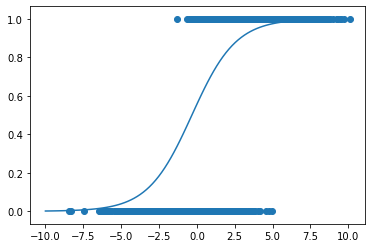

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

learning_rate = 0.01
training_epochs = 1000

# 시그모이드 함수
def sigmoid(x):
    return 1. / (1 + np.exp(-x))

# fake data
x1 = np.random.normal(-1, 2, 1000)
x2 = np.random.normal(4, 2, 1000)
xs = np.append(x1, x2)
ys = np.asarray([0.] * len(x1) + [1.] * len(x2))

# 데이터 시각화
plt.scatter(xs, ys)

X = tf.placeholder(tf.float32, shape=(None,), name="x")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")

w = tf.Variable([0., 0.], name="parameter", trainable=True)

# 텐서플로의 시그모이드 함수를 이용해 모델 정의
y_model = tf.sigmoid(w[1] * X + w[0])

# 크로스 엔트로피 비용 함수 정의
cost = tf.reduce_mean(-Y * tf.log(y_model))

# 최소화기를 정의
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # 이전 오류를 추적하기 위한 변수
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X : xs, Y : ys})
        # print(epoch, err)
        # 수렴 정도 체크
        # 변화가 거의 일어나지 않으면 학습 중단
        if abs(prev_err - err) < 0.0001:
            break
        # 이전의 오류 값을 업데이트
        prev_err = err
        w_val = sess.run(w, {X : xs, Y : ys})

all_xs = np.linspace(-10, 10, 100)
plt.plot(all_xs, sigmoid((all_xs * w_val[1] + w_val[0])))
plt.show()